<a href="https://colab.research.google.com/github/Bhargavi1504/full_project-reg-class-cluster-/blob/main/Unsupervised.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_blobs
import random

# Seed for reproducibility
np.random.seed(42)

# Generate synthetic numerical data (3 clusters)
X, y = make_blobs(n_samples=400, centers=3, n_features=3, cluster_std=2.5, random_state=42)
df = pd.DataFrame(X, columns=['Income', 'SpendingScore', 'Age'])

# Add realistic noise
df['Income'] = df['Income'] * 1000 + 30000
df['SpendingScore'] = df['SpendingScore'] * 10 + 50
df['Age'] = np.clip(df['Age'] + 40, 18, 70)

# Add categorical features
df['Gender'] = np.random.choice(['Male', 'Female'], size=400)
df['Region'] = np.random.choice(['North', 'South', 'East', 'West'], size=400)

# Add outliers
outliers = pd.DataFrame({
    'Income': np.random.normal(300000, 10000, 5),
    'SpendingScore': np.random.normal(0, 2, 5),
    'Age': np.random.uniform(18, 60, 5),
    'Gender': np.random.choice(['Male', 'Female'], 5),
    'Region': np.random.choice(['North', 'South', 'East', 'West'], 5)
})

df = pd.concat([df, outliers], ignore_index=True)

# Add missing values
for col in ['Income', 'SpendingScore', 'Age']:
    df.loc[df.sample(frac=0.03).index, col] = np.nan

# Add duplicate rows
df = pd.concat([df, df.sample(5)], ignore_index=True)

# Add multicollinear feature
df['Income_Times_2'] = df['Income'] * 2 + np.random.normal(0, 1000, size=df.shape[0])

# Final shuffle
df = df.sample(frac=1).reset_index(drop=True)

print("✅ Dataset shape:", df.shape)
df.head()


✅ Dataset shape: (410, 6)


,Income,SpendingScore,Age,Gender,Region,Income_Times_2
0,27929.685612,132.410648,46.322693,Female,South,55829.480750
1,19391.475078,84.337763,41.341310,Female,North,38255.173292
2,23029.585304,105.714437,44.029554,Male,East,45949.621317
3,NaN,106.967391,44.705019,Female,North,NaN
4,28829.531902,166.654032,48.493306,Male,South,56425.595702


Phase 2: Full Cleaning Pipeline for Clustering
✨ Steps:
📛 Handle Missing Values

🎯 Detect and Remove Duplicates

🚨 Handle Outliers

🔁 Encode Categorical Variables

🧼 Drop Multicollinear Columns

📏 Feature Scaling (StandardScaler or MinMax)

In [2]:
import pandas as pd
import numpy as np

# Load your dataset (from previous generation)
df.shape, df.head()

# Check missing values
print(df.isnull().sum())

# Impute numeric missing values with median
df['Income'].fillna(df['Income'].median(), inplace=True)
df['SpendingScore'].fillna(df['SpendingScore'].median(), inplace=True)
df['Age'].fillna(df['Age'].median(), inplace=True)

# Remove duplicate rows
df = df.drop_duplicates()
print("✅ Shape after removing duplicates:", df.shape)

def remove_outliers_iqr(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower) & (df[col] <= upper)]
    return df

df = remove_outliers_iqr(df, ['Income', 'SpendingScore', 'Age'])
print("✅ Shape after removing outliers:", df.shape)

# One-hot encode categorical variables
df_encoded = pd.get_dummies(df, columns=['Gender', 'Region'], drop_first=True)
df_encoded.head()

# Drop known multicollinear column
df_encoded.drop(columns=['Income_Times_2'], inplace=True)

#scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_encoded)

df_scaled = pd.DataFrame(scaled_features, columns=df_encoded.columns)
df_scaled.head()


Income            12
SpendingScore     12
Age               12
Gender             0
Region             0
Income_Times_2    12
dtype: int64
✅ Shape after removing duplicates: (410, 6)
✅ Shape after removing outliers: (404, 6)


/tmp/ipython-input-2-1869741295.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Income'].fillna(df['Income'].median(), inplace=True)
/tmp/ipython-input-2-1869741295.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=

,Income,SpendingScore,Age,Gender_Male,Region_North,Region_South,Region_West
0,0.238895,0.634810,1.063144,-0.995062,-0.588784,1.709482,-0.62315
1,-1.480260,0.012178,0.189312,-0.995062,1.698416,-0.584972,-0.62315
2,-0.747732,0.289045,0.660883,1.004963,-0.588784,-0.584972,-0.62315
3,0.128421,0.305273,0.779372,-0.995062,1.698416,-0.584972,-0.62315
4,0.420078,1.078325,1.443912,1.004963,-0.588784,1.709482,-0.62315


Phase 3: Exploratory Data Analysis (EDA) for Clustering
This is where we:

Understand feature distributions

Check feature relationships

Spot patterns that may influence clusters

Detect scaling/normality issues (affect clustering)

Visualize dimensionality (2D/3D space)

📏 Data Shape: (404, 7)
📊 Column Types:
 Income           float64
SpendingScore    float64
Age              float64
Gender_Male         bool
Region_North        bool
Region_South        bool
Region_West         bool
dtype: object


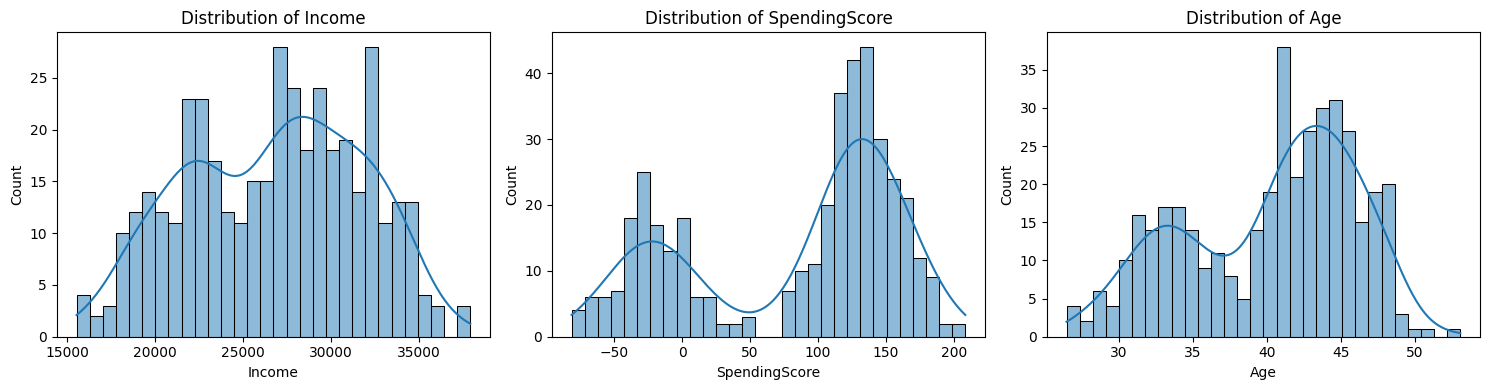

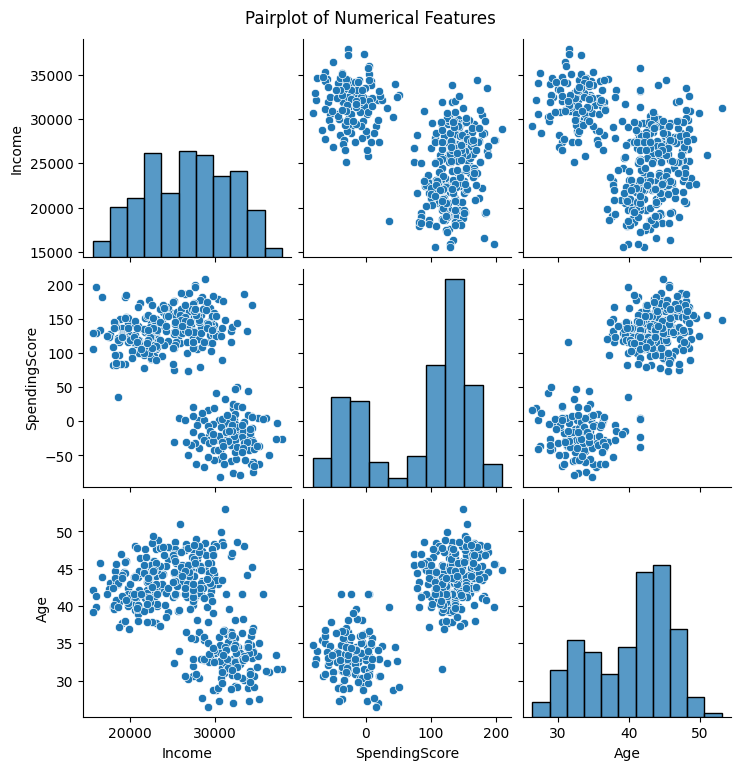

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


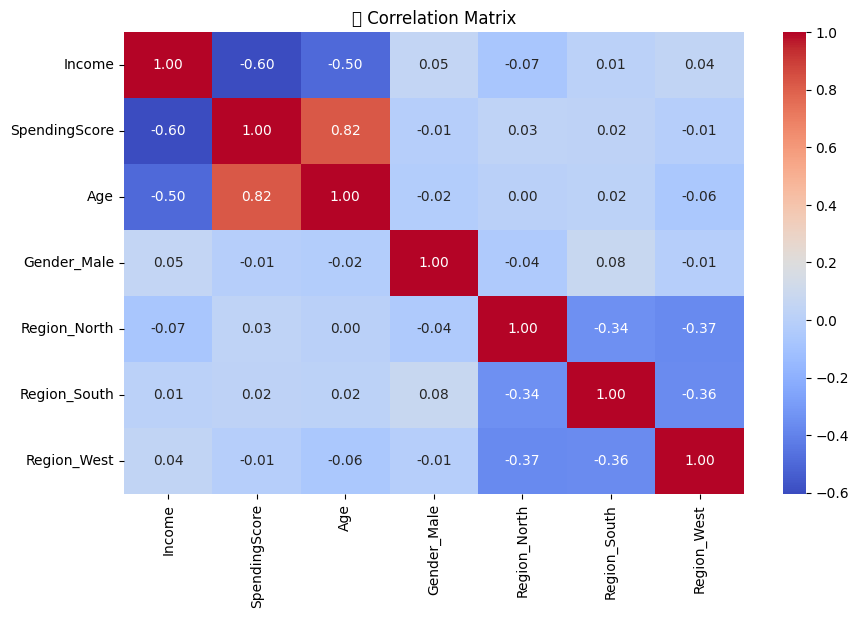

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


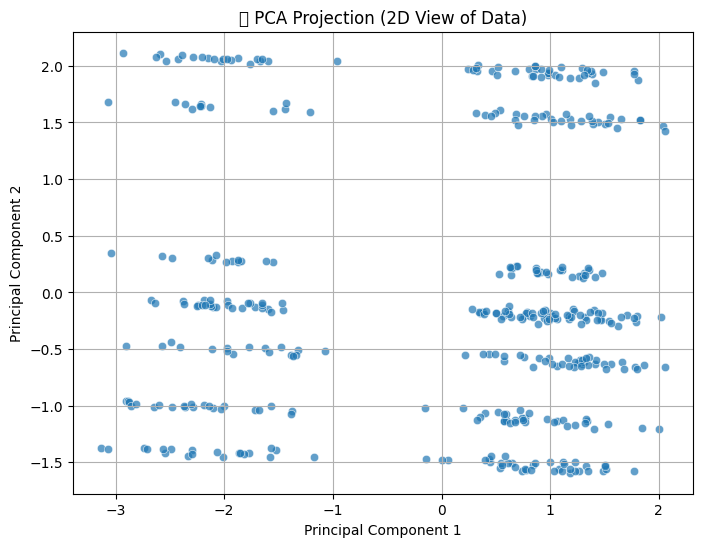

In [3]:
#View Data Summary
print("📏 Data Shape:", df_encoded.shape)
print("📊 Column Types:\n", df_encoded.dtypes)
df_encoded.describe()

#Histograms of Numerical Features
import matplotlib.pyplot as plt
import seaborn as sns

numeric_cols = ['Income', 'SpendingScore', 'Age']
plt.figure(figsize=(15, 4))
for i, col in enumerate(numeric_cols):
    plt.subplot(1, 3, i+1)
    sns.histplot(df_encoded[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

#Pairplot to Visualize Cluster-Like Groups (Unsupervised Insight)

sns.pairplot(df_encoded[numeric_cols])
plt.suptitle("Pairplot of Numerical Features", y=1.02)
plt.show()

#Correlation Matrix (to inspect multicollinearity)

plt.figure(figsize=(10, 6))
sns.heatmap(df_encoded.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("🔍 Correlation Matrix")
plt.show()

#PCA for 2D Visualization (Optional but useful)

from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(df_scaled)

pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PC1', y='PC2', data=pca_df, alpha=0.7)
plt.title("📉 PCA Projection (2D View of Data)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.grid(True)
plt.show()

/tmp/ipython-input-4-1285080469.py:31: UserWarning: Glyph 128315 (\N{DOWN-POINTING RED TRIANGLE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-4-1285080469.py:31: UserWarning: Glyph 128208 (\N{TRIANGULAR RULER}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128315 (\N{DOWN-POINTING RED TRIANGLE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128208 (\N{TRIANGULAR RULER}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


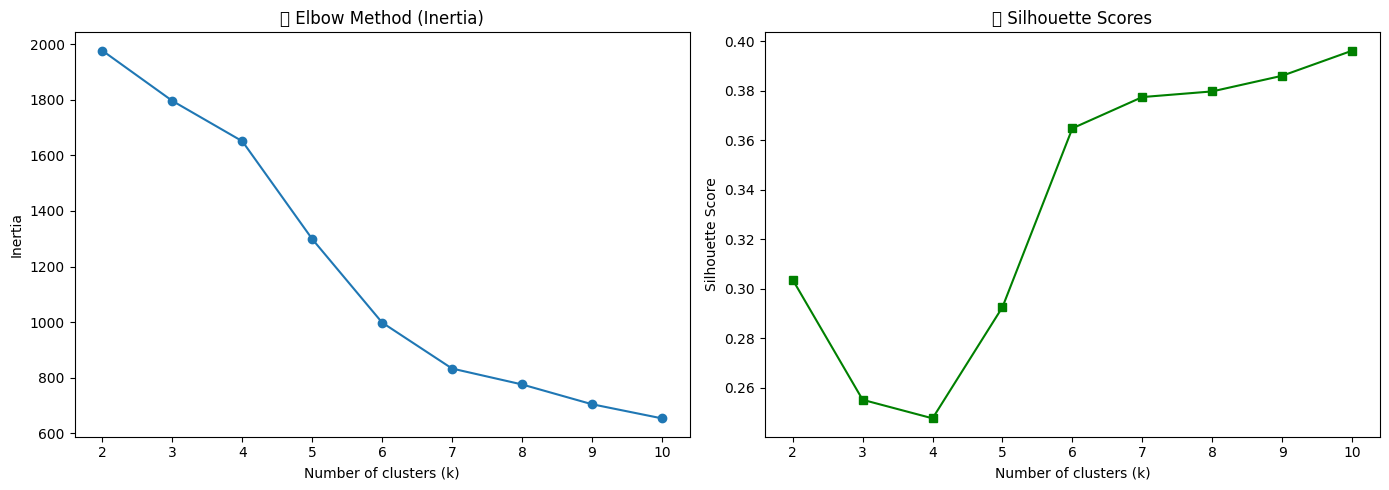

In [4]:
#kmeans
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

inertia = []
silhouette_scores = []
k_range = range(2, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(df_scaled, kmeans.labels_))

# Plot Elbow + Silhouette
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(k_range, inertia, marker='o')
plt.title('🔻 Elbow Method (Inertia)')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')

plt.subplot(1, 2, 2)
plt.plot(k_range, silhouette_scores, marker='s', color='green')
plt.title('📐 Silhouette Scores')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')

plt.tight_layout()
plt.show()


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


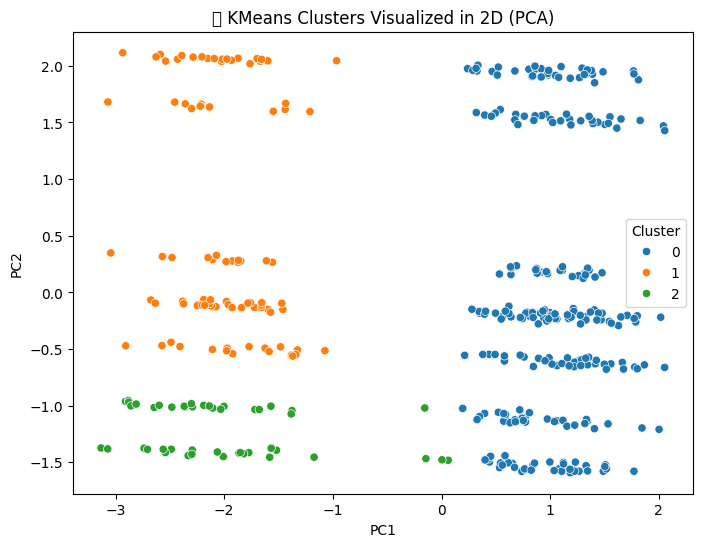

✅ Silhouette Score: 0.2552
✅ Davies-Bouldin Score: 1.339


In [6]:
# Run KMeans with selected k
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init='auto')
cluster_labels = kmeans.fit_predict(df_scaled)

# Add cluster labels to original dataset
df_encoded['Cluster'] = cluster_labels

#visualizing kmeans clusters
# Use previously computed PCA
pca_df['Cluster'] = cluster_labels

plt.figure(figsize=(8, 6))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='Cluster', palette='tab10')
plt.title("📊 KMeans Clusters Visualized in 2D (PCA)")
plt.show()

# View cluster centers in unscaled space
df_encoded.groupby('Cluster').mean()

#evaluation
from sklearn.metrics import silhouette_score, davies_bouldin_score

sil_score = silhouette_score(df_scaled, cluster_labels)
db_score = davies_bouldin_score(df_scaled, cluster_labels)

print("✅ Silhouette Score:", round(sil_score, 4))
print("✅ Davies-Bouldin Score:", round(db_score, 4))  # Lower is better


#Step 2: DBSCAN Clustering (Full Implementation)
📘 DBSCAN Summary:
Groups together points that are closely packed (dense regions)

Points in low-density regions are marked as noise (-1)

No need to specify k

Works well for non-globular clusters



/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128207 (\N{STRAIGHT RULER}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


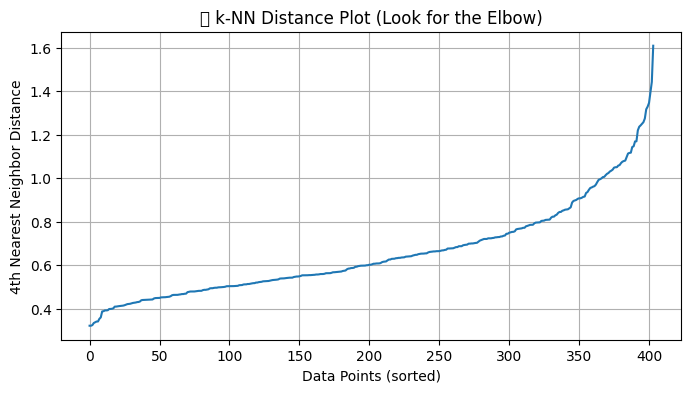

In [7]:
from sklearn.neighbors import NearestNeighbors
import numpy as np
import matplotlib.pyplot as plt

# Plot distances to k nearest neighbor
neigh = NearestNeighbors(n_neighbors=5)
nbrs = neigh.fit(df_scaled)
distances, indices = nbrs.kneighbors(df_scaled)

# Sort and plot the distances to 4th nearest neighbor
distances = np.sort(distances[:, 4])
plt.figure(figsize=(8, 4))
plt.plot(distances)
plt.title("📏 k-NN Distance Plot (Look for the Elbow)")
plt.xlabel("Data Points (sorted)")
plt.ylabel("4th Nearest Neighbor Distance")
plt.grid()
plt.show()

#Choose eps where the curve sharply increases (the elbow).

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128257 (\N{CLOCKWISE RIGHTWARDS AND LEFTWARDS OPEN CIRCLE ARROWS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


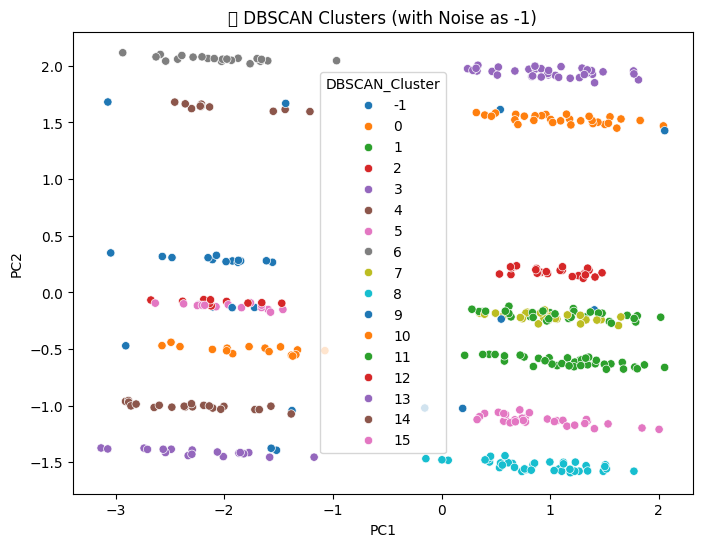

✅ Silhouette Score (DBSCAN): 0.5082
✅ Davies-Bouldin Score (DBSCAN): 0.7705


,Income,SpendingScore,Age,Gender_Male,Region_North,Region_South,Region_West,Cluster
DBSCAN_Cluster,,,,,,,,
0,23824.012542,134.488081,43.695439,0.0,0.0,1.0,0.0,0.000000
1,23848.919260,130.639960,43.338227,0.0,1.0,0.0,0.0,0.000000
2,24314.675023,132.663472,44.217393,1.0,0.0,0.0,0.0,0.000000
3,24685.244179,137.144878,43.613076,1.0,0.0,1.0,0.0,0.000000
4,32056.102422,-11.867576,32.653066,1.0,0.0,0.0,1.0,2.000000
5,23302.140979,132.666087,43.819809,1.0,0.0,0.0,1.0,0.000000
6,32924.484538,-12.843490,33.872269,1.0,0.0,1.0,0.0,1.000000
7,25135.747280,125.523514,44.222143,0.0,0.0,0.0,0.0,0.000000
8,24202.404866,140.388261,43.154626,0.0,0.0,0.0,1.0,0.157895


In [8]:
from sklearn.cluster import DBSCAN

# Run DBSCAN
dbscan = DBSCAN(eps=0.9, min_samples=5)
db_labels = dbscan.fit_predict(df_scaled)

# Add cluster labels to the dataset
df_encoded['DBSCAN_Cluster'] = db_labels

#visualization with noise
# Visualize using PCA projection
pca_df['DBSCAN_Cluster'] = db_labels

plt.figure(figsize=(8, 6))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='DBSCAN_Cluster', palette='tab10')
plt.title("🔁 DBSCAN Clusters (with Noise as -1)")
plt.show()

#evaluation
from sklearn.metrics import silhouette_score, davies_bouldin_score

# Only evaluate if more than 1 valid cluster (excluding noise)
unique_labels = set(db_labels)
if len(unique_labels) > 1 and -1 in unique_labels:
    mask = db_labels != -1
    sil_dbscan = silhouette_score(df_scaled[mask], db_labels[mask])
    dbi_dbscan = davies_bouldin_score(df_scaled[mask], db_labels[mask])

    print("✅ Silhouette Score (DBSCAN):", round(sil_dbscan, 4))
    print("✅ Davies-Bouldin Score (DBSCAN):", round(dbi_dbscan, 4))
else:
    print("⚠️ Too few clusters formed by DBSCAN or all points marked as noise.")

#cluster interpretation
# Profile DBSCAN clusters (ignoring noise -1)
df_encoded[df_encoded['DBSCAN_Cluster'] != -1].groupby('DBSCAN_Cluster').mean()


Step 3: Gaussian Mixture Models (GMM) – Soft Clustering
📘 GMM Overview:
Probabilistic model that assumes data comes from a mixture of Gaussians

Each data point belongs to a cluster with a certain probability (soft assignment)

More flexible than KMeans (can model elliptical clusters, overlapping shapes)

Uses Expectation-Maximization (EM) algorithm



/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128300 (\N{MICROSCOPE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


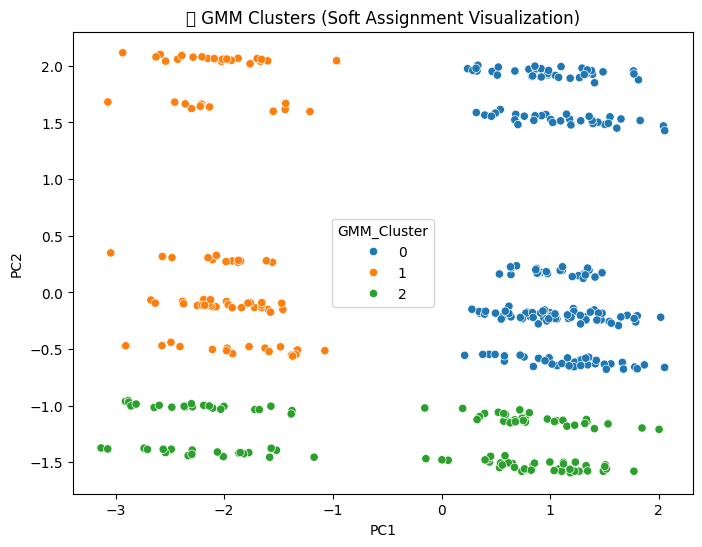

✅ Silhouette Score (GMM): 0.2762
✅ Davies-Bouldin Score (GMM): 1.4289


,Income,SpendingScore,Age,Gender_Male,Region_North,Region_South,Region_West,Cluster,DBSCAN_Cluster,Cluster_0_prob,Cluster_1_prob,Cluster_2_prob
GMM_Cluster,,,,,,,,,,,,
0.0,24383.611105,132.755891,43.765640,0.495,0.37,0.35,0.0,0.000000,3.850000,0.497487,0.241206,0.261307
1.0,31503.380866,-22.887971,33.273315,0.516484,0.32967,0.362637,0.0,1.000000,9.692308,0.539326,0.157303,0.303371
2.0,27086.080402,81.630387,39.689324,0.486726,0.0,0.0,1.0,0.814159,6.831858,0.445455,0.263636,0.290909


In [9]:
from sklearn.mixture import GaussianMixture

# Try with 3 components to start (like KMeans)
gmm = GaussianMixture(n_components=3, random_state=42)
gmm_labels = gmm.fit_predict(df_scaled)

# Add GMM cluster labels to the dataset
df_encoded['GMM_Cluster'] = gmm_labels

#visual
pca_df['GMM_Cluster'] = gmm_labels

plt.figure(figsize=(8, 6))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='GMM_Cluster', palette='tab10')
plt.title("🔬 GMM Clusters (Soft Assignment Visualization)")
plt.show()

#gmm probabilities
# Get probability of belonging to each cluster
gmm_probs = gmm.predict_proba(df_scaled)
gmm_probs_df = pd.DataFrame(gmm_probs, columns=[f"Cluster_{i}_prob" for i in range(gmm.n_components)])

# Combine with main dataframe if needed
df_encoded = pd.concat([df_encoded, gmm_probs_df], axis=1)
df_encoded[['GMM_Cluster'] + list(gmm_probs_df.columns)].head()


#evaluate gmm clustering
from sklearn.metrics import silhouette_score, davies_bouldin_score

sil_gmm = silhouette_score(df_scaled, gmm_labels)
dbi_gmm = davies_bouldin_score(df_scaled, gmm_labels)

print("✅ Silhouette Score (GMM):", round(sil_gmm, 4))
print("✅ Davies-Bouldin Score (GMM):", round(dbi_gmm, 4))

#interpret gmm cluster_labels
df_encoded.groupby('GMM_Cluster').mean()


Hierarchical Clustering Summary:
Bottom-up (agglomerative) approach:
Each point starts as its own cluster and merges step-by-step.

Visualized using a dendrogram

Doesn't require pre-specifying number of clusters (until you cut the tree)

Good for small to medium datasets

Can use different linkage criteria:

ward (minimize variance — like KMeans)

complete (farthest point)

average (average distance)

single (closest point — sensitive to chaining)

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128279 (\N{LINK SYMBOL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


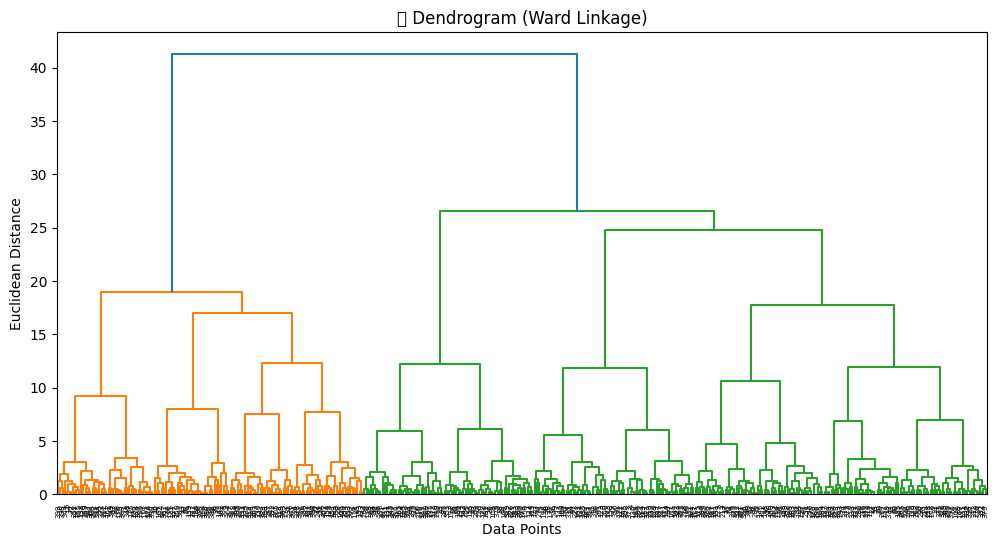

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128279 (\N{LINK SYMBOL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


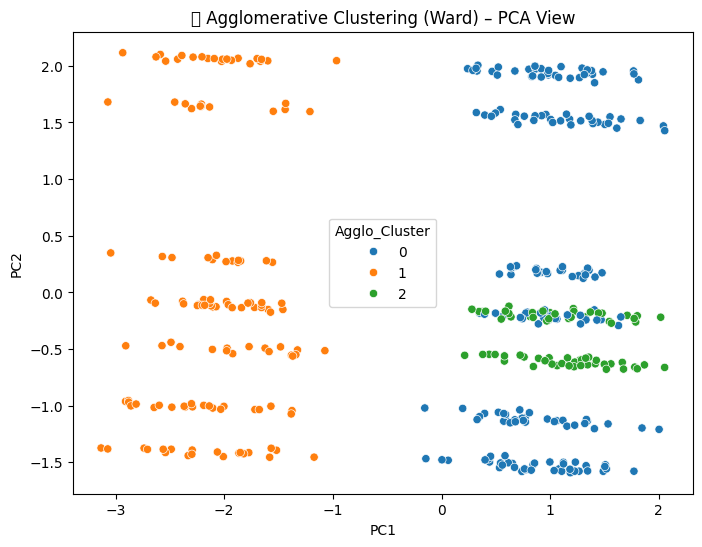

✅ Silhouette Score (Agglomerative): 0.2741
✅ Davies-Bouldin Score (Agglomerative): 1.3443


,Income,SpendingScore,Age,Cluster,DBSCAN_Cluster,GMM_Cluster,Cluster_0_prob,Cluster_1_prob,Cluster_2_prob
Agglo_Cluster,,,,,,,,,
0,26965.114897,83.091845,40.136660,0.448454,5.876289,0.768041,6.395939e-01,2.578296e-09,0.360406
1,26444.936242,87.727702,40.678809,0.431818,6.000000,0.780303,1.215834e-08,6.842105e-01,0.315789
2,26526.956913,81.036639,39.887615,0.458333,6.166667,0.791667,9.999999e-01,5.424814e-08,0.000000


In [12]:
#generate dendogram
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt

# Dendrogram
plt.figure(figsize=(12, 6))
dendrogram = sch.dendrogram(sch.linkage(df_scaled, method='ward'))
plt.title("🔗 Dendrogram (Ward Linkage)")
plt.xlabel("Data Points")
plt.ylabel("Euclidean Distance")
plt.show()

#fit agglomerative clustering
from sklearn.cluster import AgglomerativeClustering

# Choose number of clusters from dendrogram, say 3
agglo = AgglomerativeClustering(n_clusters=3, linkage='ward')
agglo_labels = agglo.fit_predict(df_scaled)

# Add to dataset
# Step 1: Reset df_encoded to match df_scaled
df_encoded_clean = df_encoded.loc[df_scaled.index].copy()

# Step 2: Add cluster labels
df_encoded_clean['Agglo_Cluster'] = agglo_labels


#visual hierachial clusters
pca_df['Agglo_Cluster'] = agglo_labels

plt.figure(figsize=(8, 6))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='Agglo_Cluster', palette='tab10')
plt.title("🔗 Agglomerative Clustering (Ward) – PCA View")
plt.show()

#evaluate clustering performance
from sklearn.metrics import silhouette_score, davies_bouldin_score

sil_agglo = silhouette_score(df_scaled, agglo_labels)
dbi_agglo = davies_bouldin_score(df_scaled, agglo_labels)

print("✅ Silhouette Score (Agglomerative):", round(sil_agglo, 4))
print("✅ Davies-Bouldin Score (Agglomerative):", round(dbi_agglo, 4))

#interpret clusters
df_encoded_clean.groupby('Agglo_Cluster').mean(numeric_only=True)


Step 5: Autoencoder + KMeans – Deep Clustering
📘 Why Autoencoder Clustering?
Traditional clustering struggles in high dimensions, or when features are not linearly separable.

Autoencoders are neural networks that learn compressed, non-linear representations (latent space).

We can cluster the compressed space using KMeans, DBSCAN, or any clustering method.

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129504 (\N{BRAIN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


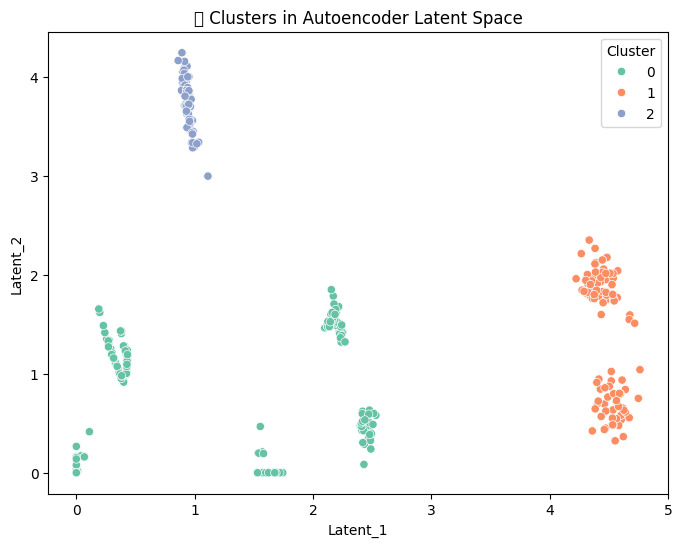

✅ Silhouette Score (Autoencoder Clustering): 0.6475
✅ Davies-Bouldin Score: 0.4948

📊 Cluster Summary (Autoencoder Clustering):


,Income,SpendingScore,Age,Cluster,DBSCAN_Cluster,GMM_Cluster,Cluster_0_prob,Cluster_1_prob,Cluster_2_prob
Auto_KMeans_Cluster,,,,,,,,,
0,26602.889965,84.792390,40.441642,0.441860,5.902326,0.748837,0.580645,4.193548e-01,0.0
1,27048.130915,85.310908,40.190647,0.441441,5.972973,0.819820,0.000000,0.000000e+00,1.0
2,26526.956913,81.036639,39.887615,0.458333,6.166667,0.791667,1.000000,5.424814e-08,0.0


In [14]:
from keras.models import Model
from keras.layers import Input, Dense
from keras.optimizers import Adam
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 🔹 STEP 1: Use filtered, scaled data (excluding outliers if Isolation Forest was used)
# Assumes df_scaled is already aligned with non-outlier rows (404 entries)
X = df_scaled  # Clean, scaled input with 404 rows

# 🔹 STEP 2: Build Autoencoder
input_dim = X.shape[1]
encoding_dim = 2  # For 2D latent space

input_layer = Input(shape=(input_dim,))
encoded = Dense(8, activation='relu')(input_layer)
encoded = Dense(encoding_dim, activation='relu')(encoded)

decoded = Dense(8, activation='relu')(encoded)
decoded = Dense(input_dim, activation='linear')(decoded)

autoencoder = Model(input_layer, decoded)
encoder = Model(input_layer, encoded)

autoencoder.compile(optimizer=Adam(learning_rate=0.01), loss='mse')
autoencoder.fit(X, X, epochs=50, batch_size=32, shuffle=True, verbose=0)

# 🔹 STEP 3: Extract latent features
latent_features = encoder.predict(X)
latent_df = pd.DataFrame(latent_features, columns=['Latent_1', 'Latent_2'])

# 🔹 STEP 4: KMeans clustering on latent features
kmeans = KMeans(n_clusters=3, random_state=42)
latent_clusters = kmeans.fit_predict(latent_features)
latent_df['Cluster'] = latent_clusters

# 🔹 STEP 5: Assign cluster labels back to cleaned data
# Align df_encoded_clean to filtered (404-row) data
df_encoded_clean = df_encoded.loc[df_scaled.index].copy()
df_encoded_clean['Auto_KMeans_Cluster'] = latent_clusters

# 🔹 STEP 6: Visualize latent space clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(data=latent_df, x='Latent_1', y='Latent_2', hue='Cluster', palette='Set2')
plt.title("🧠 Clusters in Autoencoder Latent Space")
plt.show()

# 🔹 STEP 7: Evaluate clustering
sil_auto = silhouette_score(latent_features, latent_clusters)
dbi_auto = davies_bouldin_score(latent_features, latent_clusters)

print("✅ Silhouette Score (Autoencoder Clustering):", round(sil_auto, 4))
print("✅ Davies-Bouldin Score:", round(dbi_auto, 4))

# 🔹 STEP 8: Interpret cluster centers
cluster_summary = df_encoded_clean.groupby('Auto_KMeans_Cluster').mean(numeric_only=True)
print("\n📊 Cluster Summary (Autoencoder Clustering):")
display(cluster_summary)


Step 6: Isolation Forest Clustering
Isolation Forest is primarily an anomaly detection algorithm, but it’s very useful in clustering workflows because:

✅ It helps detect outliers that may distort your cluster shapes
✅ You can use its output to flag noise/anomalies before or after clustering
✅ You can visualize clusters with and without anomalies



Goal
Use IsolationForest to identify and isolate anomalies

Visualize how these anomalies are distributed across PCA space

Compare cluster metrics before and after removing anomalies

Decide whether to exclude them for final clustering

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128680 (\N{POLICE CARS REVOLVING LIGHT}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


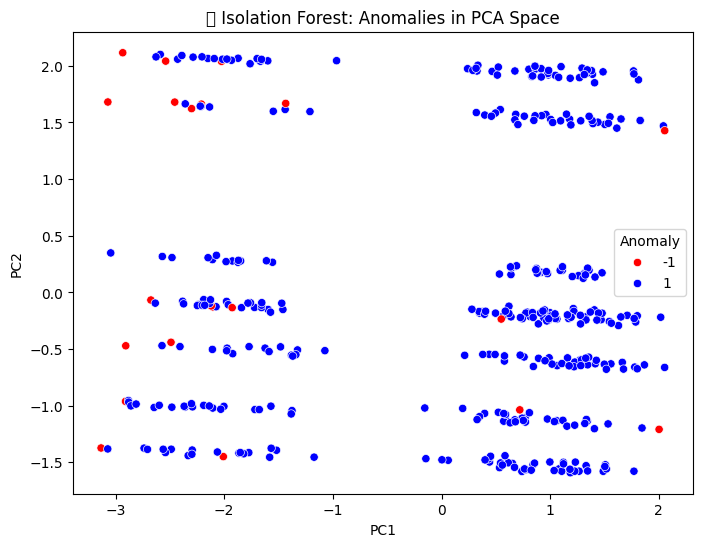

🔎 Anomaly Counts:
 Anomaly
 1    383
-1     21
Name: count, dtype: int64
📋 Cluster-wise Anomaly Analysis:
                      Income  SpendingScore        Age   Cluster  \
Agglo_Cluster                                                     
0              29904.374243      54.936814  37.980831  1.000000   
1              25696.385014      92.095197  39.318016  0.470588   
2              28722.518586     116.316289  41.025854  2.000000   

               DBSCAN_Cluster  GMM_Cluster  Cluster_0_prob  Cluster_1_prob  \
Agglo_Cluster                                                                
0                    7.000000     1.666667    3.333333e-01    1.199793e-23   
1                    6.941176     0.588235    2.529318e-12    8.235294e-01   
2                    8.000000     2.000000    9.999990e-01    9.558689e-07   

               Cluster_2_prob  Anomaly  
Agglo_Cluster                           
0                    0.666667     -1.0  
1                    0.176471     -1.0  
2 

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 10024 (\N{SPARKLES}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


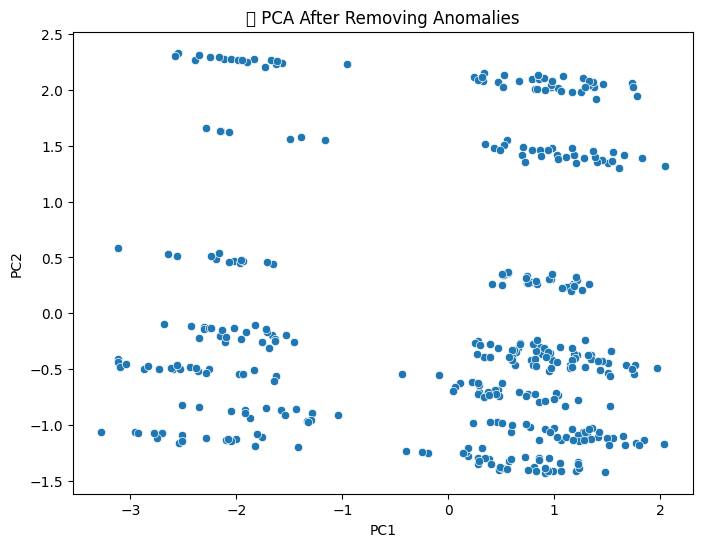

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA

# ✨ Assume `df_encoded` and `df_scaled` already exist from earlier clustering steps
# df_encoded → encoded DataFrame (with categorical + numeric)
# df_scaled → scaled numeric features for clustering

# -----------------------------------------------------------
# 🔁 STEP 1: Add Agglomerative Clusters back to df_encoded_clean
# -----------------------------------------------------------
agglo = AgglomerativeClustering(n_clusters=3, linkage='ward')
agglo_labels = agglo.fit_predict(df_scaled)

# Align indexes
df_encoded_clean = df_encoded.loc[df_scaled.index].copy()
df_encoded_clean['Agglo_Cluster'] = agglo_labels

# Optional PCA for visualization
pca = PCA(n_components=2)
pca_coords = pca.fit_transform(df_scaled)
pca_df = pd.DataFrame(pca_coords, columns=['PC1', 'PC2'], index=df_encoded_clean.index)

# -----------------------------------------------------------
# 🚨 STEP 2: Fit Isolation Forest and detect anomalies
# -----------------------------------------------------------
iso = IsolationForest(n_estimators=100, contamination=0.05, random_state=42)
iso_preds = iso.fit_predict(df_scaled)  # -1 = anomaly, 1 = normal

# Add anomaly labels
df_encoded_clean['Anomaly'] = iso_preds
pca_df['Anomaly'] = iso_preds

# -----------------------------------------------------------
# 🎨 STEP 3: Visualize Anomalies in PCA space
# -----------------------------------------------------------
plt.figure(figsize=(8,6))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='Anomaly', palette={1: 'blue', -1: 'red'})
plt.title("🚨 Isolation Forest: Anomalies in PCA Space")
plt.show()

# -----------------------------------------------------------
# 📊 STEP 4: Count anomalies
# -----------------------------------------------------------
print("🔎 Anomaly Counts:\n", df_encoded_clean['Anomaly'].value_counts())

# -----------------------------------------------------------
# 📋 STEP 5: Analyze anomalies by cluster
# -----------------------------------------------------------
anomaly_summary = df_encoded_clean[df_encoded_clean['Anomaly'] == -1].groupby('Agglo_Cluster').mean(numeric_only=True)
print("📋 Cluster-wise Anomaly Analysis:\n", anomaly_summary)

# -----------------------------------------------------------
# 🧼 STEP 6: Remove Anomalies
# -----------------------------------------------------------
df_no_outliers = df_encoded_clean[df_encoded_clean['Anomaly'] == 1].copy()
df_scaled_no_outliers = df_scaled.loc[df_no_outliers.index]

# Optional: PCA after outlier removal
pca_no_outliers = PCA(n_components=2)
pca_coords_no_outliers = pca_no_outliers.fit_transform(df_scaled_no_outliers)
pca_df_no_outliers = pd.DataFrame(pca_coords_no_outliers, columns=['PC1', 'PC2'], index=df_no_outliers.index)

plt.figure(figsize=(8,6))
sns.scatterplot(data=pca_df_no_outliers, x='PC1', y='PC2')
plt.title("✨ PCA After Removing Anomalies")
plt.show()


Step 7: NMF-Based Clustering
We'll now perform clustering using Non-negative Matrix Factorization (NMF) followed by KMeans on the NMF components.

✅ Overview of Steps:
📊 Prepare non-negative input for NMF

🧪 Apply NMF for latent representation

🎯 Run KMeans on NMF components

📈 Visualize & evaluate clusters

🧠 Interpret cluster characteristics



/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128300 (\N{MICROSCOPE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


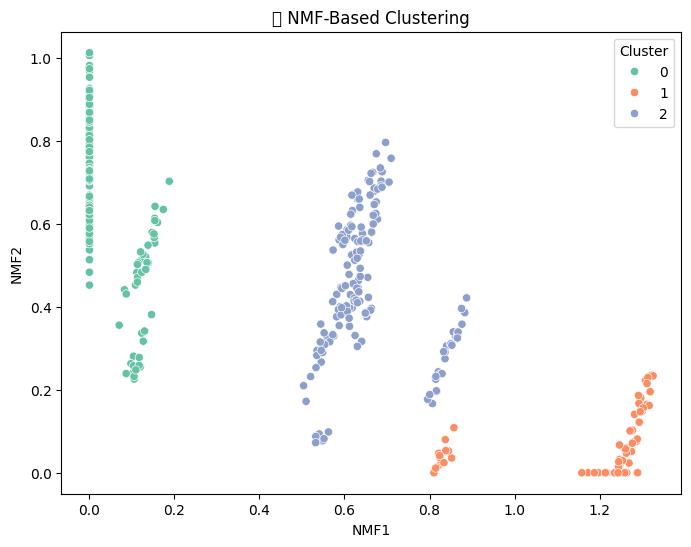

✅ Silhouette Score (NMF Clustering): 0.6296
✅ Davies-Bouldin Score: 0.5194
📋 Cluster Interpretation (NMF):
                    Income  SpendingScore        Age   Cluster  DBSCAN_Cluster  \
NMF_Cluster                                                                     
0            26739.123466      81.889309  40.220693  0.456954        5.940397   
1            27275.399448      75.068143  40.094381  0.514706        5.838235   
2            26482.884679      89.986380  40.537380  0.379747        5.917722   

             GMM_Cluster  Cluster_0_prob  Cluster_1_prob  Cluster_2_prob  \
NMF_Cluster                                                                
0               0.814570        0.441558        0.194805        0.363636   
1               0.750000        0.544118        0.455882        0.000000   
2               0.746835        0.577640        0.099379        0.322981   

             Agglo_Cluster  Anomaly  
NMF_Cluster                          
0                 0.818182   

In [17]:
from sklearn.decomposition import NMF
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score

# Step 1: Ensure non-negative data
# Min-Max scale your features so all values are >= 0
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_nmf_scaled = pd.DataFrame(scaler.fit_transform(df_scaled_no_outliers),
                             columns=df_scaled_no_outliers.columns,
                             index=df_scaled_no_outliers.index)

# Step 2: Apply NMF
nmf = NMF(n_components=2, init='random', random_state=42, max_iter=500)
nmf_features = nmf.fit_transform(df_nmf_scaled)

nmf_df = pd.DataFrame(nmf_features, columns=['NMF1', 'NMF2'], index=df_scaled_no_outliers.index)

# Step 3: KMeans on NMF components
kmeans_nmf = KMeans(n_clusters=3, random_state=42)
nmf_clusters = kmeans_nmf.fit_predict(nmf_df)

# Add to main dataframe
df_no_outliers['NMF_Cluster'] = nmf_clusters
nmf_df['Cluster'] = nmf_clusters

# Step 4: Visualize in NMF space
plt.figure(figsize=(8, 6))
sns.scatterplot(data=nmf_df, x='NMF1', y='NMF2', hue='Cluster', palette='Set2')
plt.title("🔬 NMF-Based Clustering")
plt.show()

# Step 5: Evaluate clustering
sil_nmf = silhouette_score(nmf_df[['NMF1', 'NMF2']], nmf_clusters)
dbi_nmf = davies_bouldin_score(nmf_df[['NMF1', 'NMF2']], nmf_clusters)

print("✅ Silhouette Score (NMF Clustering):", round(sil_nmf, 4))
print("✅ Davies-Bouldin Score:", round(dbi_nmf, 4))

# Step 6: Interpret clusters
cluster_summary_nmf = df_no_outliers.groupby('NMF_Cluster').mean(numeric_only=True)
print("📋 Cluster Interpretation (NMF):\n", cluster_summary_nmf)


Step 8: Autoencoder + DBSCAN
This method uses a neural network to compress your data into a dense, non-linear latent space, and then applies DBSCAN, a density-based clustering algorithm, which:

✅ Automatically finds the number of clusters

✅ Can detect noise/outliers as unclustered points

✅ Is ideal for discovering non-spherical clusters in compressed space



Workflow Steps:
🔃 Train Autoencoder on non-outlier data

📉 Extract latent space (compressed)

📍 Apply DBSCAN on latent space

📊 Visualize in latent space

📈 Evaluate and interpret clusters

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129504 (\N{BRAIN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


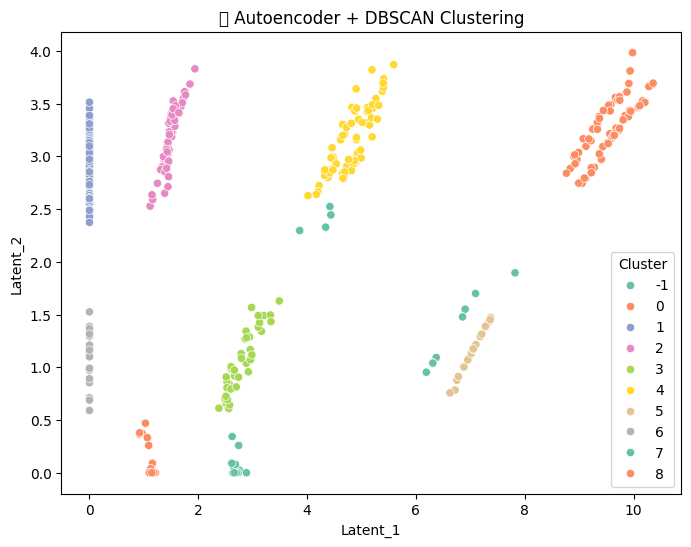

✅ Silhouette Score (Auto + DBSCAN): 0.7616
✅ Davies-Bouldin Score: 0.3179
📋 Cluster Summary (Auto + DBSCAN):
                            Income  SpendingScore        Age   Cluster  \
Auto_DBSCAN_Cluster                                                     
0                    26481.239619      79.546222  40.366360  0.463768   
1                    26496.033509      80.539743  39.871583  0.436620   
2                    27210.309328      81.714839  39.949421  0.444444   
3                    26697.564128      81.668751  40.628734  0.394737   
4                    26856.830676      86.695128  40.059034  0.406250   
5                    29602.337850      39.117983  36.360915  0.823529   
6                    25632.087029      98.019419  42.286102  0.375000   
7                    26710.932585     106.185897  42.986500  0.230769   
8                    24635.399200     110.876900  40.449548  0.466667   

                     DBSCAN_Cluster  GMM_Cluster  Cluster_0_prob  \
Auto_DBSCAN_Cluste

In [18]:
from keras.models import Model
from keras.layers import Input, Dense
from keras.optimizers import Adam
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.preprocessing import StandardScaler

# Step 1: Prepare data (non-outlier scaled data)
X_auto = df_scaled_no_outliers

# Autoencoder structure
input_dim = X_auto.shape[1]
encoding_dim = 2

input_layer = Input(shape=(input_dim,))
encoded = Dense(8, activation='relu')(input_layer)
encoded = Dense(encoding_dim, activation='relu')(encoded)

decoded = Dense(8, activation='relu')(encoded)
decoded = Dense(input_dim, activation='linear')(decoded)

autoencoder = Model(input_layer, decoded)
encoder = Model(input_layer, encoded)

# Compile & train
autoencoder.compile(optimizer=Adam(learning_rate=0.01), loss='mse')
autoencoder.fit(X_auto, X_auto, epochs=50, batch_size=32, shuffle=True, verbose=0)

# Step 2: Get latent representations
latent_space = encoder.predict(X_auto)
latent_df_dbscan = pd.DataFrame(latent_space, columns=['Latent_1', 'Latent_2'], index=df_no_outliers.index)

# Step 3: Apply DBSCAN
dbscan = DBSCAN(eps=0.25, min_samples=5)  # You can tune eps & min_samples
dbscan_labels = dbscan.fit_predict(latent_space)

# Step 4: Add to main dataframes
df_no_outliers['Auto_DBSCAN_Cluster'] = dbscan_labels
latent_df_dbscan['Cluster'] = dbscan_labels

# Step 5: Visualize
plt.figure(figsize=(8, 6))
sns.scatterplot(data=latent_df_dbscan, x='Latent_1', y='Latent_2', hue='Cluster', palette='Set2')
plt.title("🧠 Autoencoder + DBSCAN Clustering")
plt.show()

# Step 6: Evaluation (ignore outliers with label = -1)
valid_points = dbscan_labels != -1
if sum(valid_points) > 1:
    sil_db = silhouette_score(latent_space[valid_points], dbscan_labels[valid_points])
    dbi_db = davies_bouldin_score(latent_space[valid_points], dbscan_labels[valid_points])
else:
    sil_db = dbi_db = None

print("✅ Silhouette Score (Auto + DBSCAN):", round(sil_db, 4) if sil_db else "N/A")
print("✅ Davies-Bouldin Score:", round(dbi_db, 4) if dbi_db else "N/A")

# Step 7: Cluster-wise Interpretation
cluster_summary_dbscan = df_no_outliers[df_no_outliers['Auto_DBSCAN_Cluster'] != -1].groupby('Auto_DBSCAN_Cluster').mean(numeric_only=True)
print("📋 Cluster Summary (Auto + DBSCAN):\n", cluster_summary_dbscan)

# Optional: Count of each cluster
print("\n🔢 Cluster Sizes:\n", df_no_outliers['Auto_DBSCAN_Cluster'].value_counts())
